# Liabraies and Data Import

In [2]:
#importing required libraries
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing the data set
data = pd.read_csv('/content/drive/MyDrive/Glasdoor project data/Raw data/glassdoor_jobs.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Overview

In [6]:
data.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
298,298,Senior Director Biometrics and Clinical Data M...,-1,"At Alector, our mission is to develop therapie...",5.0,Alector\n5.0,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,2013,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,-1
906,906,Data Scientist,-1,"Jr. Data Scientist - Fast-growing, Location An...",5.0,Jobot\n5.0,"San Francisco, CA","Irvine, CA",51 to 200 employees,2018,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
934,934,Senior Insurance Data Scientist,$107K-$173K (Glassdoor est.),"What We'll Bring:\n\nAt TransUnion, we have a ...",3.9,TransUnion\n3.9,"Chicago, IL","Chicago, IL",5001 to 10000 employees,1968,Company - Public,Financial Analytics & Research,Finance,$1 to $2 billion (USD),-1
238,238,Data Science Manager,-1,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1


**Project Summary**
This project uses a dataset from Glassdoor containing company and job details like Company Name, Location, Size, Founded Year, Industry, Job Title, and Job Description. The aim is to predict salaries and understand how they vary across different factors.

We clean the data, perform exploratory data analysis to study salary variations, and build predictive models using linear, tree-based, and ensemble algorithms. The best model is tuned for optimal performance.

Predicted salaries provide insights for companies to decide compensation and help job seekers understand potential earnings for different roles.

**Initial Preprocessing steps**

*   Unnamed:0 is an additional column consists of index numbers. This column can be dropped or used as index.
*   Salary Estimate column cosist of range from which min and max value can be extracted and after checking the currency(if consistent with all the rows) it can also be removed to keep the range numerical.
*   A detailed checking of the Job Description is needed. If information can be extracted.
*   Company Name column needs to be cleaned by removing '\n' and ratings.
*   Location and Headquarter columns needs to be compared with a perspective of either keeping both or any one of them.
*   Country needs to be extracted from Location or Headquarters or both.
*   Size column is important to understand the scale that is an important factor. Size range can be engineered.
*   Revenue can be engineered into minimum or maximum range to extract numerical values.



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


*Columns like Salary Estimate and Revenue contain numeric values and can be converted to numeric data types for better analysis.*

In [8]:
data.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


Conclusion: None of the columns looks having missing values, but there can be values like 'Undefined' or 'NA' that needs to be checked further.

In [9]:
# checking value_counts of columns where categories are less than 30
for i in data.columns:
  if data[i].nunique() < 30:
    print(data[i].value_counts())
    print('*' * 30)

Size
1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: count, dtype: int64
******************************
Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
College / University               15
Hospital                           15
-1                                 11
Unknown                            11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64
******************************
Sector
Information Technology                239
Biotech & Pharmaceuticals             148

In [10]:
#unique categories in each column
data.nunique()

,0
Unnamed: 0,956
Job Title,328
Salary Estimate,417
Job Description,596
Rating,32
Company Name,448
Location,237
Headquarters,235
Size,9
Founded,109


In [11]:
# Column wise exploration and insight
data['Size'].value_counts()

,count
Size,
1001 to 5000 employees,177
201 to 500 employees,160
51 to 200 employees,155
10000+ employees,154
501 to 1000 employees,144
5001 to 10000 employees,79
1 to 50 employees,61
Unknown,15
-1,11


In the size column data is uniformly distributed to some extent, except some categories like 5001 to 1000 and 1 to 50, rest all major categories are approximately uniformly distributed.

In [12]:
data['Type of ownership'].value_counts()

,count
Type of ownership,
Company - Private,532
Company - Public,237
Nonprofit Organization,65
Subsidiary or Business Segment,40
Government,17
College / University,15
Hospital,15
-1,11
Unknown,11


Most of the entities are either private or pulic owned companies.

In [13]:
data['Revenue'].value_counts()

,count
Revenue,
Unknown / Non-Applicable,299
$10+ billion (USD),140
$100 to $500 million (USD),107
$1 to $2 billion (USD),68
$500 million to $1 billion (USD),62
$25 to $50 million (USD),59
$50 to $100 million (USD),52
$2 to $5 billion (USD),44
$10 to $25 million (USD),39


* 299 values are unknown or non-applicable.
* 11 values are -1 that needs to checked that what -1 means in this context.

In [14]:
data['Sector'].value_counts()

,count
Sector,
Information Technology,239
Biotech & Pharmaceuticals,148
Business Services,134
Insurance,71
Finance,56
Health Care,51
Manufacturing,40
-1,39
Aerospace & Defense,32


most of the entities belongs to the IT, Biotech & Pharmaceuticals and Business Services

# Data Pre-processing

In [15]:
# backup copy of the dataset
data_backup = data.copy()

## Droping Column
dropping redundant column

In [16]:
#dropping Unnamed: 0 column
data.drop(columns = 'Unnamed: 0', inplace =  True)

## Cleaning and Engineering of all the factors

## Job Title

In [17]:
# Changing job titles to lowercare for uniformity
data['Job Title'] = data['Job Title'].str.lower()

### Salary Estimate

In [18]:
data['Salary Estimate']

,Salary Estimate
0,$53K-$91K (Glassdoor est.)
1,$63K-$112K (Glassdoor est.)
2,$80K-$90K (Glassdoor est.)
3,$56K-$97K (Glassdoor est.)
4,$86K-$143K (Glassdoor est.)
5,$71K-$119K (Glassdoor est.)
6,$54K-$93K (Glassdoor est.)
7,$86K-$142K (Glassdoor est.)
8,$38K-$84K (Glassdoor est.)
9,$120K-$160K (Glassdoor est.)


In [19]:
# replacing texts to change salary estimate to a numerical column
data['Salary Estimate'] = data['Salary Estimate'].replace({
    '\$':'',
    'K':'',
    '\(Glassdoor est.\)':'',
    'Employer Provided Salary:':'',
    '\(Employer est.\)':''}, regex = True
)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\('
<>:7: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\('
<>:7: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-3917659341.py:3: SyntaxWarning: invalid escape sequence '\$'
  '\$':'',
/tmp/ipython-input-3917659341.py:5: SyntaxWarning: invalid escape sequence '\('
  '\(Glassdoor est.\)':'',
/tmp/ipython-input-3917659341.py:7: SyntaxWarning: invalid escape sequence '\('
  '\(Employer est.\)':''}, regex = True


In [20]:
# checking number of rows where Salary Estimate is missing and marked as -1
data[data['Salary Estimate'] == '-1'].shape[0]

214

In [21]:
# removing rows from data where appropriate salary estimate value is not available
data = data[data['Salary Estimate'] != '-1']

**Changing per hour Salary Estimates to yearly salary for scaling**

In [22]:
#checking values where Salary estimates are given for per hour
data[data['Salary Estimate'].str.contains('Per Hour')]['Salary Estimate']

,Salary Estimate
197,17-24 Per Hour
209,21-34 Per Hour
240,18-25 Per Hour
247,21-34 Per Hour
257,15-25 Per Hour
307,17-24 Per Hour
337,21-34 Per Hour
427,18-25 Per Hour
437,24-39 Per Hour
456,21-34 Per Hour


Cleaning the Salary estimate column and converting per hour to annual income.


Note: 40 hours per week is a standard working hour in most of the nations hence
**annual salary = per hour charge * hours in week(40) * total weeks a year(52)**
*then number is multiplied by 1000 to bring it in terms of thousand*.

In [23]:
# Storing the lower limit of salary estimate in a different column by splitting
data['Salary Estimate Low'] = data['Salary Estimate'].str.split('-').str.get(0).astype(int)

In [24]:
# Storing the higher limit of salary estimate in a different column
data['Salary Estimate High'] = data['Salary Estimate'].str.split('-').str.get(1)

In [25]:
# deriving a temporary column from Salary Estimate High column to process the Per Hour Values
data['Salary Estimate temp'] = data['Salary Estimate High'].str.split().str.get(1)

In [26]:
# converting value in Salary Estimate High column to integer type to apply arithmatical operations
data['Salary Estimate High'] = data['Salary Estimate High'].str.replace(' Per Hour','').astype(int)

In [27]:
# changing Per Hour values to annual, for Lower limit column.
data['Salary Estimate Low'] = data.apply(
    lambda _row : (int(round((_row['Salary Estimate Low']*40*52))))
    if _row['Salary Estimate temp'] == 'Per'
    else _row['Salary Estimate Low']*1000,
    axis = 1)

In [28]:
# applying arithmatical operation in all the rows to convert Per Hour income to annual for Higer limit column
data['Salary Estimate High'] = data.apply(
    lambda _row: (int(round(_row['Salary Estimate High']*40*52)))
     if _row['Salary Estimate temp'] == 'Per'
    else _row['Salary Estimate High']*1000,
    axis = 1)

### Company Name

In [29]:
# job postings by each company
data['Company Name'].value_counts()

,count
Company Name,
MassMutual\n3.6,14
Takeda Pharmaceuticals\n3.7,14
Reynolds American\n3.1,14
Software Engineering Institute\n2.6,11
PNNL\n3.8,10
Liberty Mutual Insurance\n3.3,10
AstraZeneca\n3.9,9
MITRE\n3.2,8
Novartis\n3.8,7


In [30]:
# removing additional details from column
data['Company Name'] = data['Company Name'].str.split('\n').str.get(0)

### Job Descripton

In [31]:
data['Job Description']

,Job Description
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu..."
1,What You Will Do:\n\nI. General Summary\n\nThe...
2,"KnowBe4, Inc. is a high growth information sec..."
3,*Organization and Job ID**\nJob ID: 310709\n\n...
4,Data Scientist\nAffinity Solutions / Marketing...
5,CyrusOne is seeking a talented Data Scientist ...
6,Job Description\n\n**Please only local candida...
7,Advanced Analytics – Lead Data Scientist\nOver...
8,SUMMARY\n\nThe Research Scientist I will be ta...
9,isn’t your usual company. Our work is powered ...


In [32]:
# Different columns for frequently mentioned skills in Job Description
data['Python'] = data['Job Description'].str.lower().str.contains('python').astype(int)
data['Machine Learning'] = data['Job Description'].str.lower().str.contains('machine learning').astype(int)
data['Azure'] = data['Job Description'].str.lower().str.contains('azure').astype(int)
data['aws'] = data['Job Description'].str.lower().str.contains('aws').astype(int)
data['Power BI'] = data['Job Description'].str.lower().str.contains('power bi').astype(int)
data['Tableau'] = data['Job Description'].str.lower().str.contains('tableau').astype(int)
data['PyTorch'] = data['Job Description'].str.lower().str.contains('pytorch').astype(int)
data['Tensorflow'] = data['Job Description'].str.lower().str.contains('tensorflow').astype(int)
data['Apache'] = data['Job Description'].str.lower().str.contains('apache').astype(int)
data['API'] = data['Job Description'].str.lower().str.contains('api').astype(int)
data['Deep Learning'] = data['Job Description'].str.lower().str.contains('deep learning').astype(int)
data['Tensorflow'] = data['Job Description'].str.lower().str.contains('tensorflow').astype(int)
data['C++'] = data['Job Description'].str.lower().str.contains('c++').astype(int)
data['Java'] = data['Job Description'].str.lower().str.contains('java').astype(int)
data['PostGresSQL'] = data['Job Description'].str.lower().str.contains('postgres').astype(int)

In [33]:
# regex import
import re

In [34]:
data['R'] = data['Job Description'].apply(lambda x: int(bool(re.search(r'\W+R\W+', x))))
data['C'] = data['Job Description'].apply(lambda x: int(bool(re.search(r'\W+C\W+', x))))

### Location and Country

In [35]:
# Extracting Country information from location column
data['Country'] = data['Location'].str.split(',').str.get(1)

In [36]:
data['Location']= data['Location'].str.split(',').str.get(0)

In [37]:
# checking number of entries from each conutry and location
data['Country'].value_counts()

,count
Country,
CA,151
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
WA,21


In [38]:
data['Location'].value_counts()

,count
Location,
New York,55
San Francisco,49
Cambridge,48
Chicago,32
Boston,23
San Jose,13
Pittsburgh,12
Washington,11
Rockville,11


### Revenue

In [39]:
data['Revenue'].value_counts()

,count
Revenue,
Unknown / Non-Applicable,203
$10+ billion (USD),124
$100 to $500 million (USD),91
$1 to $2 billion (USD),60
$500 million to $1 billion (USD),57
$50 to $100 million (USD),46
$25 to $50 million (USD),40
$2 to $5 billion (USD),39
$10 to $25 million (USD),32


In [40]:
#grouping data to check unknown revenvues with respect to Company Name
grouped = data.groupby(['Company Name', 'Revenue'])[['Company Name','Revenue']]

In [41]:
for name, group in grouped:
  print(group)
  print('*'*40)

                Company Name                 Revenue
557  1-800-FLOWERS.COM, Inc.  $1 to $2 billion (USD)
****************************************
    Company Name                   Revenue
61      1904labs  Unknown / Non-Applicable
541     1904labs  Unknown / Non-Applicable
****************************************
    Company Name                   Revenue
928      23andMe  Unknown / Non-Applicable
****************************************
    Company Name                   Revenue
112   7Park Data  Unknown / Non-Applicable
****************************************
    Company Name                     Revenue
9       <intent>  $100 to $500 million (USD)
127     <intent>  $100 to $500 million (USD)
****************************************
    Company Name                   Revenue
583         ALIN  Unknown / Non-Applicable
****************************************
    Company Name                 Revenue
170      AVANADE  $2 to $5 billion (USD)
****************************************
   

There are entities for which revenue detail is missing, and out 955 rows, 204 rows have missing values so this column can be dropped and Size column can represent the scale of entity

### Size

In [42]:
data['Size'].value_counts()

,count
Size,
1001 to 5000 employees,150
501 to 1000 employees,134
10000+ employees,130
201 to 500 employees,117
51 to 200 employees,94
5001 to 10000 employees,76
1 to 50 employees,31
Unknown,9
-1,1


### Industry/Sector

In [43]:
#count of unique sectors and industries
data['Industry'].value_counts()

,count
Industry,
Biotech & Pharmaceuticals,112
Insurance Carriers,63
Computer Hardware & Software,59
IT Services,50
Health Care Services & Hospitals,49
Enterprise Software & Network Solutions,42
Internet,29
Consulting,29
Advertising & Marketing,25


In [44]:
data['Sector'].value_counts()

,count
Sector,
Information Technology,180
Biotech & Pharmaceuticals,112
Business Services,97
Insurance,69
Health Care,49
Finance,42
Manufacturing,34
Aerospace & Defense,25
Education,23


In [45]:
# dropping Industry column as industry and sector are related and sector has less catagories
data.drop(columns = 'Industry', inplace = True)

### Type of ownership

In [46]:
data['Type of ownership'].value_counts()

,count
Type of ownership,
Company - Private,410
Company - Public,193
Nonprofit Organization,55
Subsidiary or Business Segment,34
Government,15
Hospital,15
College / University,13
Other Organization,3
School / School District,2


In [47]:
#Replacing two missing values with mode
data['Type of ownership'] = data['Type of ownership'].replace(['Unknown','-1'], data['Type of ownership'].mode()[0])

In [48]:
# replcing schools and colleges with educational institutions
data['Type of ownership'] = data['Type of ownership'].replace(['College / University','School / School District'], 'Educational Institution')

In [49]:
data['Type of ownership'].value_counts()

,count
Type of ownership,
Company - Private,412
Company - Public,193
Nonprofit Organization,55
Subsidiary or Business Segment,34
Hospital,15
Government,15
Educational Institution,15
Other Organization,3


# Dropping Features and splitting

In [50]:
# Dropping columns after extracting required information
data.drop(columns = ['Salary Estimate','Job Description','Rating','Headquarters','Founded','Competitors','Salary Estimate temp'], inplace = True)

#Data Cleaning Part 2

##Missing value Handling

### Missing values identification

In [52]:
# Identifying column that contains unknown or -1 in values
(data == "Unknown").sum()

,0
Job Title,0
Company Name,0
Location,0
Size,9
Type of ownership,0
Sector,0
Revenue,0
Salary Estimate Low,0
Salary Estimate High,0
Python,0


In [53]:
(data == "-1").sum()

,0
Job Title,0
Company Name,0
Location,0
Size,1
Type of ownership,0
Sector,10
Revenue,1
Salary Estimate Low,0
Salary Estimate High,0
Python,0


In [54]:
(data == "Unknown / Non-Applicable").sum()

,0
Job Title,0
Company Name,0
Location,0
Size,0
Type of ownership,0
Sector,0
Revenue,203
Salary Estimate Low,0
Salary Estimate High,0
Python,0


In [55]:
# dropping revenue column
data.drop(columns = 'Revenue', inplace = True)

### Sector

In [56]:
# Checking rows where Sector is -1 for cleaning
data[data['Sector'] == '-1']

,Job Title,Company Name,Location,Size,Type of ownership,Sector,Salary Estimate Low,Salary Estimate High,Python,Machine Learning,Azure,aws,Power BI,Tableau,PyTorch,Tensorflow,Apache,API,Deep Learning,C++,Java,PostGresSQL,R,C,Country
43,data engineer,Persivia,Marlborough,1 to 50 employees,Company - Private,-1,68000,129000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,MA
377,data operations lead,Muso,San Francisco,201 to 500 employees,Nonprofit Organization,-1,85000,90000,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,CA
472,"research scientist, immunology - cancer biology",Kronos Bio,Cambridge,Unknown,Company - Private,-1,100000,140000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,MA
518,"senior scientist, cell pharmacology/assay deve...",Kronos Bio,Cambridge,Unknown,Company - Private,-1,110000,130000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,MA
583,data scientist,ALIN,New York,Unknown,Company - Private,-1,81000,140000,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,NY
703,"research scientist, immunology - cancer biology",Kronos Bio,Cambridge,Unknown,Company - Private,-1,100000,140000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,MA
741,"scientist – cancer discovery, molecular assay",Monte Rosa Therapeutics,Cambridge,-1,Company - Private,-1,100000,135000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,MA
778,"senior scientist, cell pharmacology/assay deve...",Kronos Bio,Cambridge,Unknown,Company - Private,-1,110000,130000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,MA
819,"principal research scientist/team lead, medici...",Kronos Bio,Cambridge,Unknown,Company - Private,-1,120000,145000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,MA
943,"research scientist, immunology - cancer biology",Kronos Bio,Cambridge,Unknown,Company - Private,-1,100000,140000,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,MA


In [57]:
# dropping 8 rows where industry and size both are missing
data.drop(index = [472,518,583,703,741,778,819,943], axis = 0, inplace = True)

In [58]:
data[data['Sector'] == '-1']

,Job Title,Company Name,Location,Size,Type of ownership,Sector,Salary Estimate Low,Salary Estimate High,Python,Machine Learning,Azure,aws,Power BI,Tableau,PyTorch,Tensorflow,Apache,API,Deep Learning,C++,Java,PostGresSQL,R,C,Country
43,data engineer,Persivia,Marlborough,1 to 50 employees,Company - Private,-1,68000,129000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,MA
377,data operations lead,Muso,San Francisco,201 to 500 employees,Nonprofit Organization,-1,85000,90000,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,CA


In [59]:
# replacing missing value with Sector name
data.loc[43, 'Sector'] = "Health Care Services & Hospitals"
data.loc[377, 'Sector'] = "Health Care Services & Hospitals"

### Size

In [60]:
# Checking unknown values in Size column
data[data['Size'] == "Unknown"]

,Job Title,Company Name,Location,Size,Type of ownership,Sector,Salary Estimate Low,Salary Estimate High,Python,Machine Learning,Azure,aws,Power BI,Tableau,PyTorch,Tensorflow,Apache,API,Deep Learning,C++,Java,PostGresSQL,R,C,Country
48,data scientist,BPA Services,Washington,Unknown,Company - Private,Information Technology,150000,160000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,DC
477,data scientist,BPA Services,Washington,Unknown,Company - Private,Information Technology,150000,160000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,DC


In [61]:
data['Size'].value_counts()

,count
Size,
1001 to 5000 employees,150
501 to 1000 employees,134
10000+ employees,130
201 to 500 employees,117
51 to 200 employees,94
5001 to 10000 employees,76
1 to 50 employees,31
Unknown,2


In [62]:
#Filling missinng value in the size column with mode of particualr industry
information_technology_size_mode = data[data['Sector'] == 'Information Technology']['Size'].mode()[0]

In [63]:
data.loc[48, 'Size'] = information_technology_size_mode
data.loc[477, 'Size'] = information_technology_size_mode

## Binning required features

### Size column Binning

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

### Reducing categories in Sector

In [65]:
data['Sector'].value_counts()

,count
Sector,
Information Technology,180
Biotech & Pharmaceuticals,112
Business Services,97
Insurance,69
Health Care,49
Finance,42
Manufacturing,34
Aerospace & Defense,25
Education,23


In [66]:
# Grouping similar and less frequent sectors to reduce categorical dimensionality
data['Sector'] = data['Sector'].replace(['Telecommunications','Media','Arts, Entertainment & Recreation'],'Telecom Meadia and Entertainment')\
.replace('Construction, Repair & Maintenance','Real Estate')\
.replace('Health Care Services & Hospitals','Health Care')\
.replace('Mining & Metals','Oil, Gas, Energy & Utilities')\
.replace(['Accounting & Legal','Agriculture & Forestry','Consumer Services'],'Other')

In [67]:
data['Sector'].value_counts()

,count
Sector,
Information Technology,180
Biotech & Pharmaceuticals,112
Business Services,97
Insurance,69
Health Care,51
Finance,42
Manufacturing,34
Aerospace & Defense,25
Education,23


### Type of Ownership

In [68]:
data['Type of ownership'].value_counts()

,count
Type of ownership,
Company - Private,404
Company - Public,193
Nonprofit Organization,55
Subsidiary or Business Segment,34
Hospital,15
Government,15
Educational Institution,15
Other Organization,3


In [69]:
# Grouping similar or less frequent categories
data['Type of ownership'] = data['Type of ownership'].replace({
    'Subsidiary or Business Segment':'Company - Private',
    'Government' : 'Company - Public',
    'Hospital': 'Other Organization',
    'Educational Institution': 'Other Organization'
})

In [70]:
data['Type of ownership'].value_counts()

,count
Type of ownership,
Company - Private,438
Company - Public,208
Nonprofit Organization,55
Other Organization,33


### Cleaning Output Column

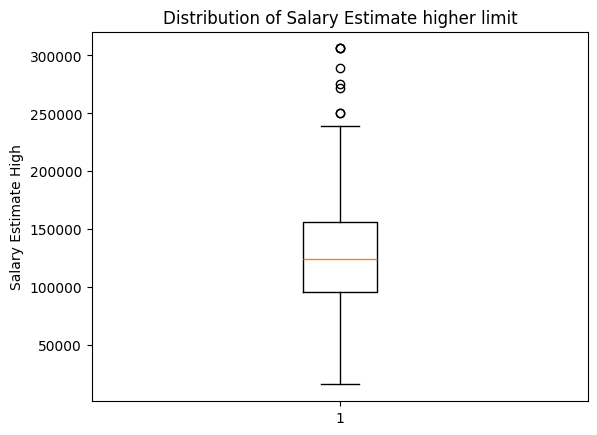

In [71]:
# Distribution of Salary Estimate High Column
plt.boxplot(data['Salary Estimate High'])
plt.title('Distribution of Salary Estimate higher limit')
plt.xlabel(None)
plt.ylabel('Salary Estimate High')
plt.show()

In [72]:
# Calculation of upper and lower limit for output identification
Q1 = data['Salary Estimate High'].quantile(0.25)
Q3 = data['Salary Estimate High'].quantile(0.75)

In [73]:
IQR = Q3 - Q1
lower_limit = Q1 -(1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [74]:
print(IQR)
print(lower_limit)
print(upper_limit)

60500.0
5250.0
247250.0


In [75]:
# Removing ouliers
data = data[data['Salary Estimate High'] < upper_limit]

## Changing values to numerical

In [76]:
#check later
# Scipy import
from scipy import stats

In [77]:
#check later
groups = [group['Salary Estimate High'].values for name, group in data.groupby("Location")]
fvalue, pvalue = stats.f_oneway(*groups)
print(f'F-Satatistics: {fvalue}, p_value : {pvalue}')

F-Satatistics: 3.4455481209234917, p_value : 2.2850671552059208e-29


In [78]:
# Creating a new column for mean salry estimate using upper and lower limit of salary estimate
data['Estimate Salary Mean'] = round((data['Salary Estimate High'] + data['Salary Estimate Low'])/ 2)

/tmp/ipython-input-2534766578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Estimate Salary Mean'] = round((data['Salary Estimate High'] + data['Salary Estimate Low'])/ 2)


# EDA

## Univariate analysis

In [79]:
# Seaborn import
import seaborn as sns

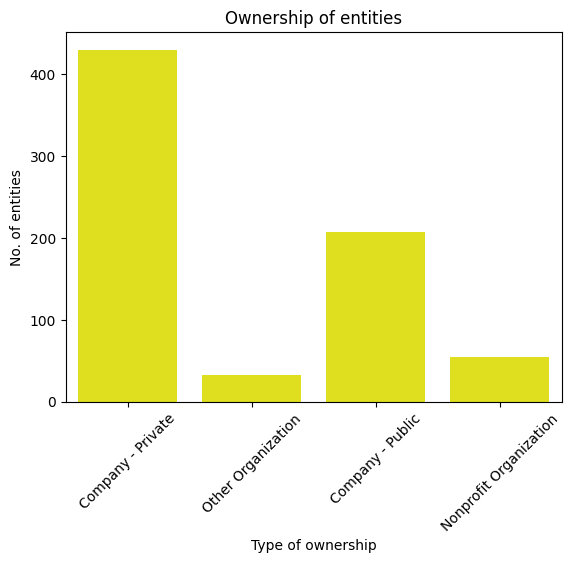

In [80]:
# Visualisation of distribution of entities based on type of ownership
sns.countplot(data = data, x = 'Type of ownership', color = 'yellow')
plt.title('Ownership of entities')
plt.xticks(rotation = 45)
plt.ylabel('No. of entities')
plt.show()

*Most of the entities in the market are Privately owned companies followed by Public owned companies. Non-Profit and Other organisations are comparatively fewer in numbers.*

In [81]:
set(data['Size'])

{'1 to 50 employees',
 '10000+ employees',
 '1001 to 5000 employees',
 '201 to 500 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees'}

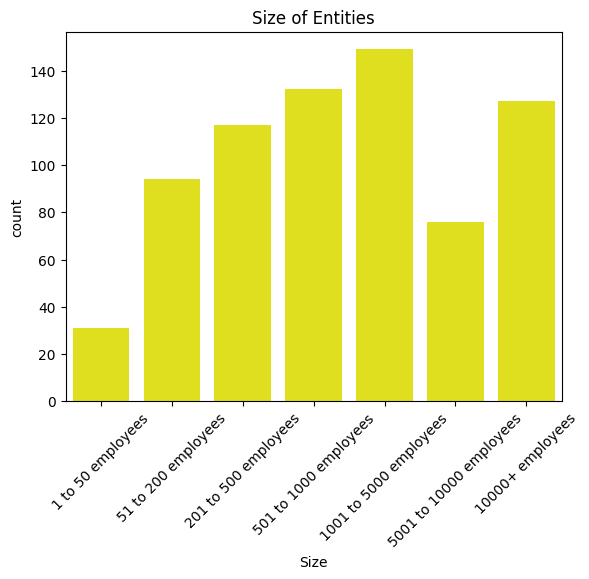

In [82]:
# Visualization of Entities based on Size
size_order = ['1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees',
              '1001 to 5000 employees','5001 to 10000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']
sns.countplot(data = data, x = 'Size', color = 'yellow', order = size_order)
plt.xticks(rotation = 45)
plt.title('Size of Entities')
plt.show()

*Entities with size 1001 to 5000 employees is the most frequent category in the data. Entities with size 51 to 1000 and 10,000+ employees are also significantly present the data but very small entities ranging from 1 to 50 employees are lesser in number.*

Text(0.5, 1.0, 'Entities in Different Sectors')

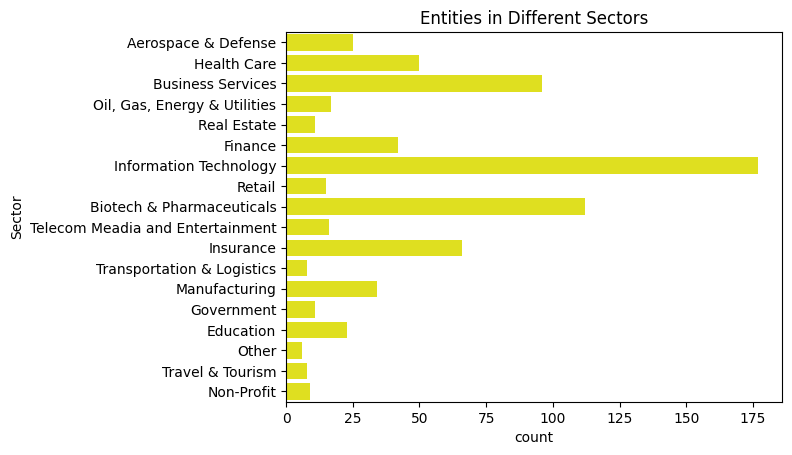

In [83]:
# Visualization of entities based on Sector
sns.countplot(y = data['Sector'], color = 'yellow')
plt.title('Entities in Different Sectors')

Information Technology is the biggest sector in the market and 2nd larget is Biotech & Pharmaceuticals and there is a big gap among the largest and the second largest sector in terms of number of entities. Business Services, Insurance, Health Care and Finance are some other prominent sectors. There are fewer entities in sectors like Real estate, Non-Profit and Travel and Tourism

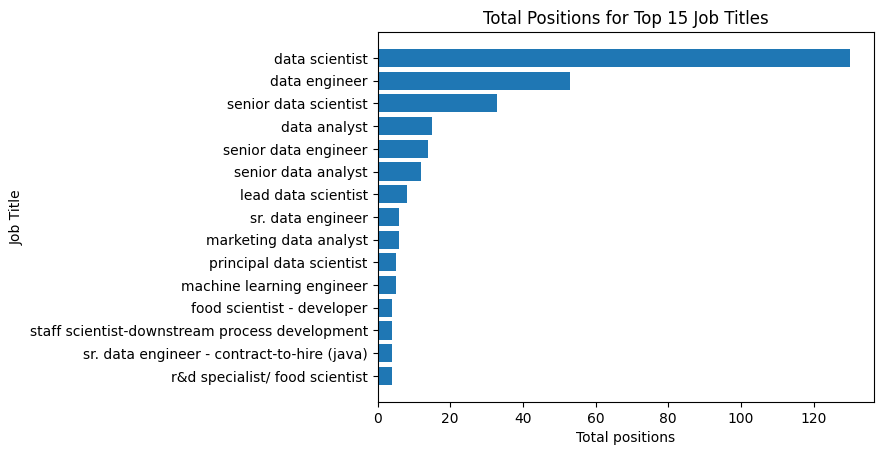

In [84]:
# Visualisation of 15 most frequent job titles using value counts
top_job_title = data['Job Title'].value_counts().head(15)
plt.barh(y = top_job_title.index, width = top_job_title.values)
plt.gca().invert_yaxis()
plt.title('Total Positions for Top 15 Job Titles')
plt.xlabel('Total positions')
plt.ylabel('Job Title')
plt.show()

Data Scientist is the most in demand job followed by data engineer and data analyst. After 8th most frequent job titles, rest of the jobs are showing an even distribution.

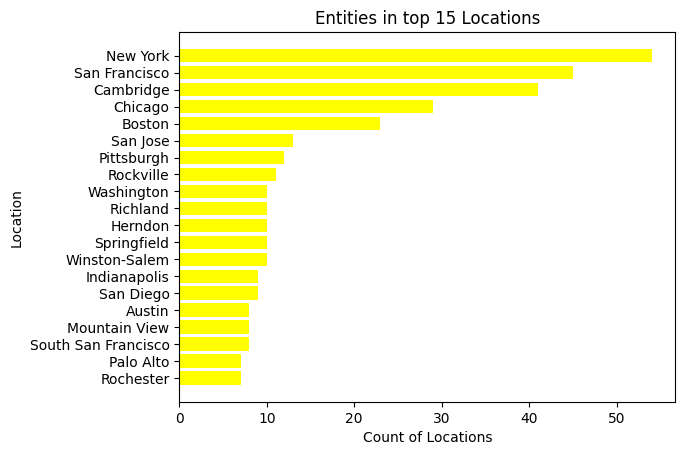

In [85]:
# Visulasizatin of entities by Location
top_locations = data['Location'].value_counts().head(20)
plt.barh(y =  top_locations.index, width = top_locations.values, color = 'yellow')
plt.gca().invert_yaxis()
plt.title('Entities in top 15 Locations')
plt.xlabel('Count of Locations')
plt.ylabel('Location')
plt.show()

Most of the entities are located in New York, San Francisco and Cambridge and after top 5 locations, distribution is quite even and gradually declining.

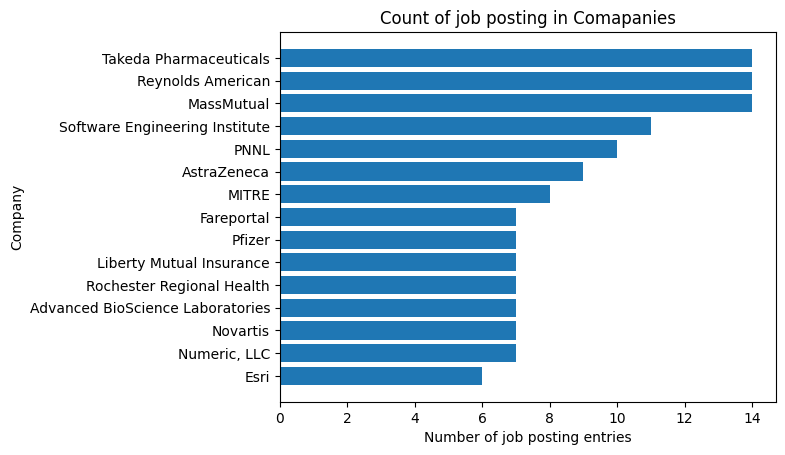

In [86]:
# 15 most frequent company names
top_companies = data['Company Name'].value_counts().head(15)
plt.barh(y = top_companies.index, width = top_companies.values)
plt.title('Count of job posting in Comapanies')
plt.xlabel('Number of job posting entries')
plt.ylabel('Company')
plt.gca().invert_yaxis()
plt.show()

Top 3 copmanies as per total number of job posting entries in the data are Takeda Pharmaceuticals, Reynolds American, MassMutual with 14 entries each.

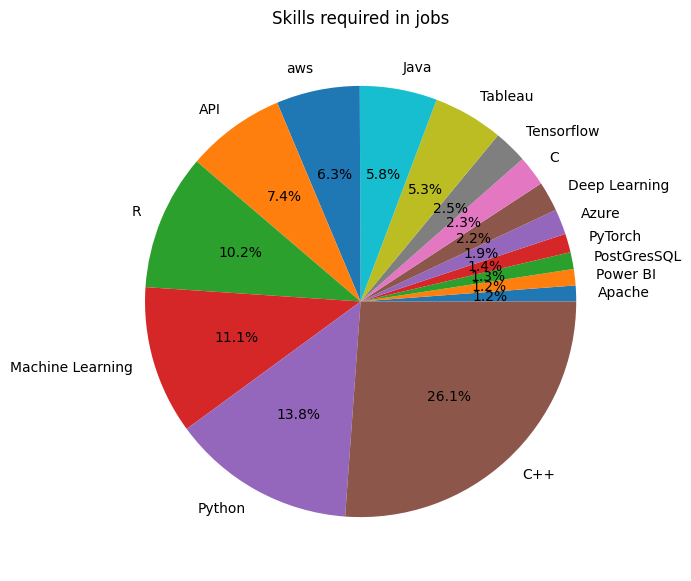

In [87]:
# analysis of demand different of skills for jobs
plt.figure(figsize = (7,7))
skills_data = data.iloc[:, 8:24]
skills_sum = skills_data.sum().sort_values()
plt.pie(x = skills_sum.values, labels = skills_sum.index, autopct = '%1.1f%%')
plt.title('Skills required in jobs')
plt.show()

C++ has a significant higher demand then rest of the skills. After that Python, Machine Learning and R are most frequently demanded skills.

## Bivariate analysis

In [88]:
# average estimate salary for each category of size
data[['Size','Estimate Salary Mean']].groupby('Size').mean().reset_index()

,Size,Estimate Salary Mean
0,1 to 50 employees,105076.129032
1,10000+ employees,109477.165354
2,1001 to 5000 employees,93765.637584
3,201 to 500 employees,100247.863248
4,5001 to 10000 employees,97518.947368
5,501 to 1000 employees,89462.575758
6,51 to 200 employees,110286.808511


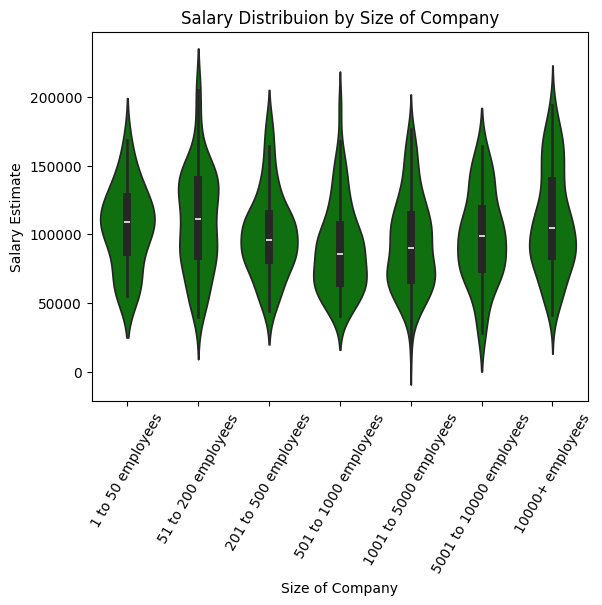

In [89]:
# Visualization of average salary for different catregories of size
size_order = ['1 to 50 employees','51 to 200 employees', '201 to 500 employees','501 to 1000 employees',
              '1001 to 5000 employees','5001 to 10000 employees', '10000+ employees']
sns.violinplot(data = data, x = 'Size', y = 'Estimate Salary Mean', color = 'green', order = size_order)
plt.xticks(rotation = 60)
plt.title('Salary Distribuion by Size of Company')
plt.ylabel('Salary Estimate')
plt.xlabel('Size of Company')
plt.show()

We can interpret from the analysis of Size of Comapany with respect to Salary Estimate that there is not a very major difference among the different Sizes of the companies still a pattern that is noticable is that small companies upto 500 employees and large companies having more than 5000 employees are paying comparatively higher salaries. We can also observe the most of the density for mid size entities lies in their lower mid of median whereas in small and large entities the density is better distributed between low to high range salaries and most of density lying towards the median.

In [90]:
# Comparision of statistical measures for different Sizes of entities
data.groupby("Size")["Estimate Salary Mean"].agg(
    mean="mean",
    median="median",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)

,mean,median,q1,q3
Size,,,,
1 to 50 employees,105076.129032,109000.0,87000.0,127500.0
10000+ employees,109477.165354,104500.0,84500.0,139000.0
1001 to 5000 employees,93765.637584,90000.0,67000.0,114000.0
201 to 500 employees,100247.863248,96000.0,81000.0,114500.0
5001 to 10000 employees,97518.947368,98500.0,75125.0,118375.0
501 to 1000 employees,89462.575758,86000.0,64500.0,107000.0
51 to 200 employees,110286.808511,111000.0,84125.0,139375.0


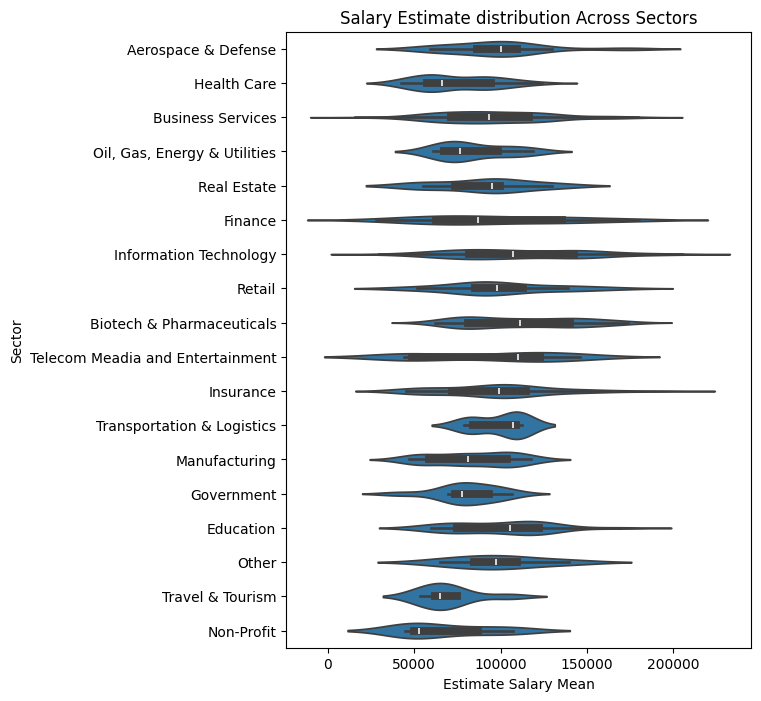

In [91]:
# Sector wise comaparison of Salary Estimate
plt.figure(figsize = (6, 8))
sns.violinplot(y = 'Sector', x = 'Estimate Salary Mean', data = data)
plt.title('Salary Estimate distribution Across Sectors')
plt.show()

There are some sectors that cover a large range of salaries ranging from low to high salaries like Business Services, Finance, Information and Technology, Insurance, etc. Then there are some sectors where distrinbution of salary is compact like Health Care, Real Estate, Manufacturing, Oil Gas and Utilities etc.

Aerospace and Defence, IT, Biotech and Pharamaceuticals are some of the sectors where median salary is higher and Health Care, Finance and Travel and tourism are some of the sectors where median salary is low.

In [92]:
# Storing value counts in a variable to filter frequent locations
location_count = data['Location'].value_counts()

In [93]:
# Filtering locations with 5 or more occurrences
frequent_locations = location_count[location_count >= 5].index

In [94]:
print(frequent_locations)

Index(['New York', 'San Francisco', 'Cambridge', 'Chicago', 'Boston',
       'San Jose', 'Pittsburgh', 'Rockville', 'Washington', 'Richland',
       'Herndon', 'Springfield', 'Winston-Salem', 'Indianapolis', 'San Diego',
       'Austin', 'Mountain View', 'South San Francisco', 'Palo Alto',
       'Rochester', 'Salt Lake City', 'Phoenix', 'Charlotte', 'Marlborough',
       'Chantilly', 'Huntsville', 'Gaithersburg', 'Dallas', 'Seattle',
       'Denver', 'Worcester', 'Philadelphia', 'Milwaukee', 'Nashville',
       'Cincinnati'],
      dtype='object', name='Location')


In [95]:
# Extracting data of frequent locations using boolean masking
data_frequent_locations = data[data['Location'].apply(lambda x: True if x in frequent_locations else False)]

In [96]:
# Sorting the locations as per meadian
sorted_locations = data[['Location', 'Estimate Salary Mean']].groupby('Location').median().sort_values(by = 'Estimate Salary Mean').index
sorted_locations = [loc for loc in sorted_locations if loc in data_frequent_locations['Location'].unique()]

Text(0.5, 1.0, 'Salary Estimate by Location')

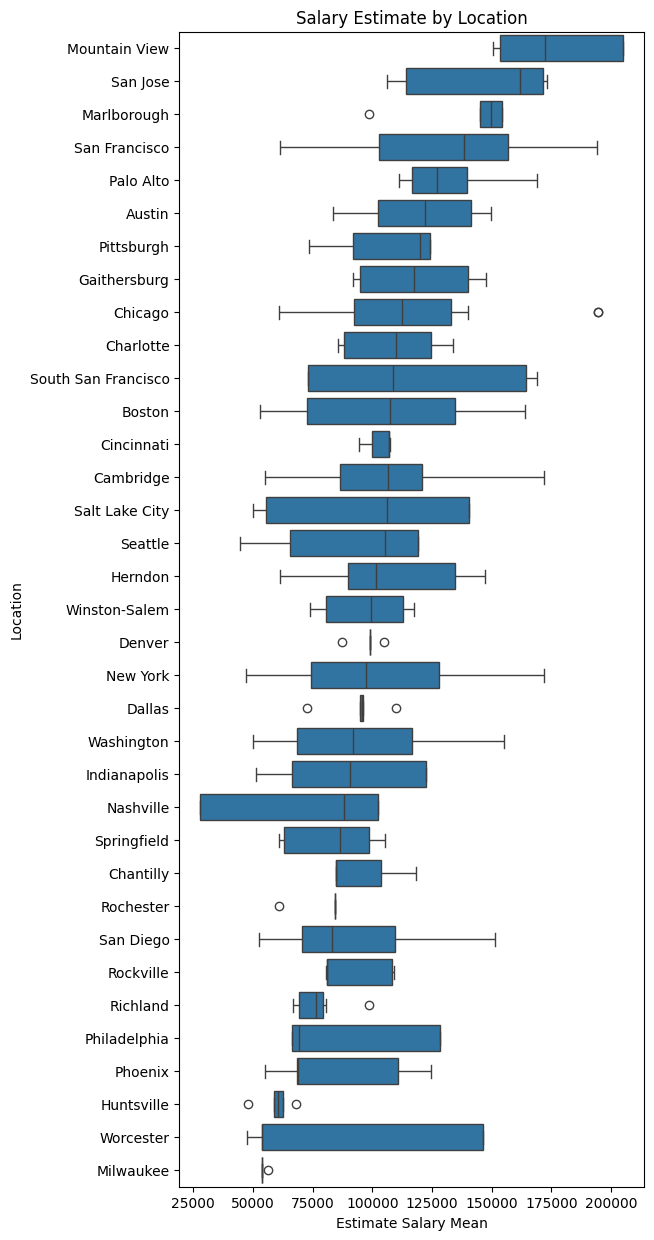

In [97]:
# Distribution of salary by location
plt.figure(figsize= (6,15))
sns.boxplot(y = 'Location', x = 'Estimate Salary Mean', data = data_frequent_locations , order= sorted_locations)
plt.gca().invert_yaxis()
plt.title('Salary Estimate by Location')

Inference:
Salaries are changing for different locations. In the plot the medians and the whiskers are visible with different ranges. There are cities like Mountain View, San Jose, Marlborough and San Francisco where the median salaries are as high as 150000+ and then there cities like Seattle, Herndon, Winston-Salem where median of salaries fall around 1 lakh.
It is also noticable that some locations like Washington, New York, San Franciso that have wide whiskers that means all sort of jobs are available ranging from average to high paying.
Then we also have some locations where salaries are not much versatile like Richland, Chantilly, Marlborough etc.

<Axes: xlabel='Estimate Salary Mean', ylabel='Job Title'>

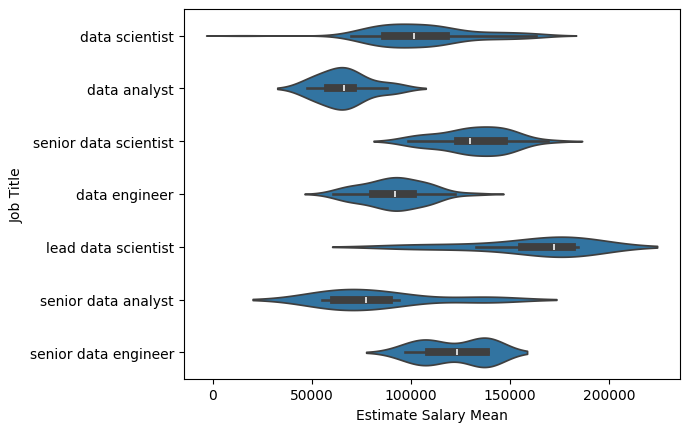

In [98]:
# Visualising salary by Job Title with more than 6 occurences
sns.violinplot(data = data[data['Job Title'].map(data['Job Title'].value_counts()>6)],
              x= 'Estimate Salary Mean', y = 'Job Title')

We can interpret from this presentation of most frequent job titles  there are jobs like data scientist, lead data scientist and lead data scientist that cover a large range of salries whereas jobs like data analyst , data engineer and senior data engeneer jobs are offering a targeted salary. Salaries offered in data Science and data Engineer jobs are comparable and this pattern is fllowed at the senior positions of both the job roles as well. Packages at the data analyst positons are comparatively lower than the data scientist and data engineering roles and this patter is justified because in the real world data science and data engineering jobs require more skills compared to data analyst jobs.



#Training Models

In [99]:
# Importing tools required for modeling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [100]:
#Defining input features and output features
X = data.drop(columns = ['Company Name', 'Location', 'Salary Estimate Low', 'Salary Estimate High', 'Estimate Salary Mean'])
y = data['Estimate Salary Mean']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now we have split the training and test set, we will make a preprocessor to transform the columns with high cardinality using Ordinal Encoder and columns with low encoder using one hot encoder. We can skip the Binary Columns as they don't need any transformation.

In [102]:
# Preprocessor to tranform categorical and numerical columns differently
skills_col = X.loc[:,'Python':'C'].columns
ord_col = ['Job Title','Country', 'Sector']
ohe_col = [col for col in X.columns if ((col not in ord_col) and (col not in skills_col))]

preprocessor = ColumnTransformer([("ord_encode", OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1), ord_col),
                                  ("ohe_encode", OneHotEncoder(handle_unknown = 'ignore'), ohe_col)],
                                 remainder = 'passthrough')

In [103]:
# Initialising models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=5, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}


In [104]:
# Fitting data in pipline and model comparision
result = []
for name, model in models.items():
  pipe = Pipeline(steps = [("preprocessor", preprocessor),
                           ("model", model)])
  pipe.fit(X_train, y_train)
  pred = pipe.predict(X_test)

  mae = mean_absolute_error(y_test, pred)
  mse = mean_squared_error(y_test, pred)

  result.append([name, mae, mse])

result_df = pd.DataFrame(result, columns = ["Model Name", "MAE", "MSE"])
print(result_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+10, tolerance: 7.389e+07
  model = cd_fast.enet_coordinate_descent(


                 Model Name           MAE           MSE
0         Linear Regression  21807.663605  7.651389e+08
1                     Lasso  21806.977311  7.651050e+08
2             Decision Tree  21508.893188  8.071819e+08
3             Random Forest  17412.452411  5.272349e+08
4         Gradient Boosting  10872.808561  3.329332e+08
5                   XGBoost   9226.484977  3.066569e+08
6  Support Vector Regressor  25567.044197  9.874418e+08


On comparing the performance of different models, Gradient Boosting and XGBoost emerged as the best models. We will use Randomized Search CV to find the best hyperparameters and predict the output using them.

In [105]:
# Finding best paramerters for model and training model
param_grid = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__gamma": [0, 0.1, 0.3],
    "model__reg_alpha": [0, 0.01, 0.1],
    "model__reg_lambda": [1, 1.5, 2]
}

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', XGBRegressor(random_state=42))])

rs = RandomizedSearchCV(pipe, param_grid, n_iter=30, cv=3,
                        scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)

rs.fit(X_train, y_train)

print("Best params:", rs.best_params_)
print("Best MAE:", -rs.best_score_)

# Predicting output for test data
pred = rs.predict(X_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'model__subsample': 0.7, 'model__reg_lambda': 1.5, 'model__reg_alpha': 0.01, 'model__n_estimators': 500, 'model__max_depth': 7, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__colsample_bytree': 0.7}
Best MAE: 14083.322335385674


The final model predicts the salary with a Mean Absolute Error (MAE) of $14,342.

Text(0, 0.5, 'Salary Estimate')

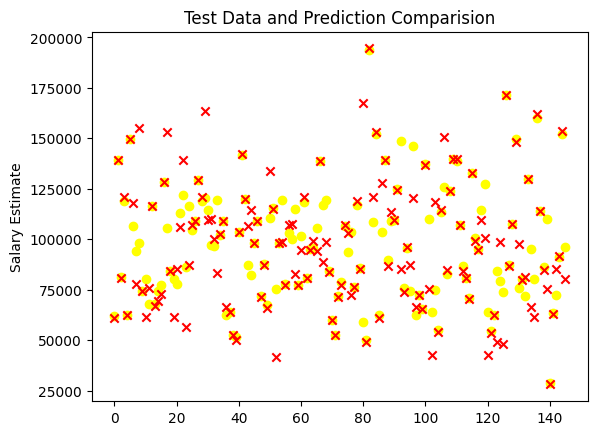

In [106]:
plt.scatter(x = range(len(y_test)),y = pred, color = 'yellow')
plt.scatter(x = range(len(y_test)),y = y_test, color = 'red', marker = 'x')
plt.title('Test Data and Prediction Comparision')
plt.ylabel('Salary Estimate')